In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from wanna_buy_house.data import final_treatment
from wanna_buy_house.utils import final_transformer

In [7]:
data_cleaned = final_treatment()
data= final_transformer(data_cleaned)
#Converted Year.Credit.History.Labeled from category to int64
data['Year.Credit.History.Labeled'] = data['Year.Credit.History.Labeled'].astype('int64')
data.dtypes

get_data 0.18


Loan.Status                            int64
Credit.Minus.Loan                      int64
Years.current_job_enc                  int64
Tax.Liens.Enc                          int64
Leverage                             float64
Bankruptcies.enc                       int64
Years.since.last.delinquent            int64
Loan.vs.Income                       float64
Term.Encoded                         float64
Number.of.Open.Accounts.Labeled        int64
Number.of.Credit.Problems.Labeled      int64
Credit.Score.Labeled                   int64
Year.Credit.History.Labeled            int64
H.O.Home Mortgage                    float64
H.O.Own Home                         float64
H.O.Rent                             float64
Purp.Business Loan                   float64
Purp.Buy House                       float64
Purp.Buy a Car                       float64
Purp.Debt Consolidation              float64
Purp.Home Improvements               float64
Purp.Medical Bills                   float64
Purp.Other

In [5]:
df_old = pd.read_csv('raw_data/train.csv')
df_old

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,Short Term,739.0,6 years,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,Long Term,619.0,6 years,Rent,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,Short Term,738.0,less than 1 year,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,Short Term,738.0,4 years,Rent,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,Short Term,731.0,10+ years,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,84184,99999999,Short Term,725.0,3 years,Rent,52589.0,Business Loan,128.84,14.5,21.0,6,0,6160,14736,0.0,0.0,1
60800,84185,18229,Short Term,747.0,3 years,Rent,91143.0,Debt Consolidation,782.31,18.0,14.0,16,0,8328,51095,0.0,0.0,0
60801,84186,10165,Short Term,NaN,5 years,Rent,NaN,Buy a Car,156.44,8.9,NaN,10,0,5954,24400,0.0,0.0,1
60802,84187,99999999,Short Term,744.0,9 years,Rent,30450.0,Debt Consolidation,725.73,16.0,NaN,8,1,4446,7813,1.0,0.0,1


In [22]:
df_old.isnull().sum()

Loan.ID                             0
Current.Loan.Amount                 0
Term                                0
Credit.Score                    12229
Years.in.current.job             2529
Home.Ownership                      0
Annual.Income                   12229
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    32475
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                      127
Tax.Liens                           2
Loan.Status                         0
dtype: int64

# Inferences

### Current.Loan.Amount

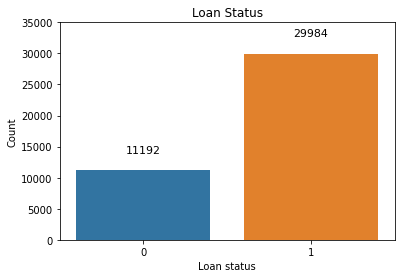

In [21]:
ax = sns.countplot(x="Loan.Status", data=data)
ax.set_title('Loan Status')
ax.set_ylim(0, 35000)
ax.set(xlabel='Loan status', ylabel='Count')
for p in ax.patches:
             ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
        
plt.show()

 ### Term

In [ ]:
sns.catplot(y="Loan.Status", kind="bar", data=df)

### Home.Ownership

In [ ]:
sns.catplot(x="Home.Ownership", y="Loan.Status", kind="bar", data=df, height=4, aspect=2)

### Annual.Income

In [ ]:
sns.barplot(data=df, y="Annual.Income", x="Loan.Status")

### Current.Credit.Balance

In [ ]:
sns.barplot(data=df_old, y="Current.Credit.Balance", x="Loan.Status")

### Number.of.Open.Accounts.Buckets

In [ ]:
df.loc[df["Number.of.Open.Accounts.Buckets"] == 'mais de 20', "Number.of.Open.Accounts.Buckets"] = '> 20'
list_accounts = df['Number.of.Open.Accounts.Buckets'].sort_values().unique()

sns.catplot(x="Number.of.Open.Accounts.Buckets", y="Loan.Status", kind="bar", data=df, height=4, aspect=2, order=list_accounts)

### Credit.Minus.Loan

In [ ]:
sns.catplot(x="Credit.Minus.Loan", y="Loan.Status", kind="bar", data=df, height=4, aspect=2)

### Number.of.Credit.Problems.Buckets

In [ ]:
sns.catplot(x="Number.of.Credit.Problems.Buckets", y="Loan.Status", kind="bar", data=df, height=4, aspect=2)

### Years.in.current.job.enc

In [ ]:
df.loc[df["Years.in.current.job"] == 'less than  1 year', "Years.in.current.job"] = '0-1 year'
df.loc[df["Years.in.current.job"] == '10+ years', "Years.in.current.job"] = '> 10 years'

list_years = df['Years.in.current.job'].sort_values().unique()


g = sns.catplot(x="Years.in.current.job.enc", hue="Loan.Status", kind="count", data=df)
g.fig.set_size_inches(15,4)

In [ ]:
sns.catplot(x="Years.in.current.job.enc", y="Loan.Status", kind="bar", data=df, height=4, aspect=3)
sns.catplot(x="Years.in.current.job", y="Loan.Status", kind="bar", data=df_old, height=4, aspect=3)

### Purpose.Categories

In [ ]:
plot_order = df.groupby('Purpose.Categories')['Loan.Status'].mean().sort_values(ascending=False).index.values

sns.catplot(x="Purpose.Categories", y="Loan.Status", kind="bar", data=df, height=4, aspect=3, order=plot_order)

### Tax.Liens.enc

In [ ]:
sns.catplot(x="Tax.Liens.enc", y="Loan.Status", kind="bar", data=df, height=4, aspect=1)

### Leverage

In [ ]:
sns.barplot(data=df, y="Leverage", x="Loan.Status")

### Credit.Score.Buckets

In [ ]:
sns.catplot(data=df, x="Credit.Score.Buckets", y="Loan.Status", kind='bar')

### Years.of.Credit.History.enc

In [ ]:
df.loc[df["Years.of.Credit.History.enc"] == '30+', "Years.of.Credit.History.enc"] = '> 30'
df.loc[df["Years.of.Credit.History.enc"] == '0 a 10', "Years.of.Credit.History.enc"] = '0-10'
df.loc[df["Years.of.Credit.History.enc"] == '10.1 a 20', "Years.of.Credit.History.enc"] = '10-20'
df.loc[df["Years.of.Credit.History.enc"] == '20.1 a 30', "Years.of.Credit.History.enc"] = '20-30'

list_credit = df['Years.of.Credit.History.enc'].sort_values().unique()

sns.catplot(data=df, x="Years.of.Credit.History.enc", y="Loan.Status", kind='bar', order=list_credit)

### Bankruptcies.enc

In [ ]:
sns.catplot(data=df, x="Bankruptcies.enc", y="Loan.Status", kind='bar')

### Years.since.last.delinquent

In [ ]:
sns.catplot(data=df, x="Years.since.last.delinquent", y="Loan.Status", kind='bar')

### Loan.vs.Income

In [ ]:
sns.barplot(data=df, y="Loan.vs.Income", x="Loan.Status")

# Boxplots and Distplots

### Current.Loan.Amount

In [ ]:
sns.boxplot(y= df['Current.Loan.Amount'], x=df['Loan.Status'])

In [ ]:
sns.displot(df, x="Current.Loan.Amount", hue='Loan.Status', kind='kde', fill=True)

### Annual.Income

In [ ]:
sns.boxplot(y= df['Annual.Income'], x=df['Loan.Status'])

In [ ]:
sns.displot(df, x="Annual.Income", hue='Loan.Status', kind='kde', fill=True)

### Current.Credit.Balance

In [ ]:
sns.boxplot(y= df['Current.Credit.Balance'], x=df['Loan.Status'])

In [ ]:
sns.displot(df, x="Current.Credit.Balance", hue='Loan.Status', kind='kde', fill=True)

### Leverage

In [ ]:
sns.boxplot(y= df['Leverage'], x=df['Loan.Status'])

In [ ]:
sns.displot(df, x="Leverage", hue='Loan.Status', kind='kde', fill=True)

### Loan.vs.Income

In [ ]:
sns.boxplot(y= df['Loan.vs.Income'], x=df['Loan.Status'])

In [ ]:
sns.displot(df, x="Loan.vs.Income", hue='Loan.Status', kind='kde', fill=True)

# Correlation


In [ ]:
# Correlation Marix

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.title("Variables Correlation Matrix")
plt.show()

# Pandas Profiling

In [ ]:
import pandas_profiling

df.profile_report()

In [ ]:
import pandas_profiling

df_old.profile_report()